# **Saudi Used Car Price Prediction**

## **Business Problem Understanding**

### **Context**
Pasar mobil bekas di Arab Saudi adalah industri yang besar dan dinamis, di mana platform seperti Syarah.com bertindak sebagai perantara (marketplace) yang mempertemukan penjual (sellers) dan calon pembeli (buyers). Dalam ekosistem ini, interaksi harga sangat krusial.

Untuk menjual mobil, penjual (baik individu maupun dealer) mendaftarkan kendaraan mereka dengan memasukkan detail spesifikasi. Namun, tantangan utama muncul pada saat penentuan harga. Model bisnis saat ini memberikan kebebasan penuh kepada penjual untuk menentukan harga jual atau bahkan membiarkannya kosong (negotiable). Hal ini sering kali menyulitkan penjual:

- Jika harga dipatok terlalu tinggi dibandingkan mobil serupa (tahun, jarak tempuh, kondisi yang sama), mobil akan sulit terjual dan lama mengendap di inventaris (slow-moving).

- Sebaliknya, jika harga terlalu rendah, penjual akan kehilangan potensi keuntungan (profit loss).

### **Problem Statemenet**
Salah satu tantangan terbesar bagi pasar mobil bekas adalah asimetri informasi dan ketidakpastian harga. Tanpa adanya benchmark harga yang akurat, pasar menjadi tidak efisien.

Mengingat penjual memiliki kebebasan penuh dalam menentukan harga tanpa panduan data yang kuat, sering terjadi disparitas harga yang tajam untuk mobil dengan spesifikasi serupa. Hal ini menciptakan kebingungan bagi pembeli (takut membayar terlalu mahal/overpaying) dan keraguan bagi penjual. Selain itu, banyaknya listing dengan status harga "Negotiable" (harga 0) menambah friksi dalam transaksi karena mengharuskan negosiasi panjang tanpa titik awal yang jelas.

Dengan bertambahnya jumlah listing setiap harinya, kemampuan untuk menentukan harga yang tepat (right-pricing) secara cepat menjadi kunci untuk memenangkan persaingan pasar dan mempercepat likuiditas aset.

### **Goals**
Berdasarkan permasalahan tersebut, tujuan utama proyek ini adalah mengembangkan sebuah Machine Learning Model (Price Prediction Tool) yang dapat memprediksi harga pasar yang wajar untuk sebuah mobil bekas.

- Bagi Penjual: Alat ini akan membantu merekomendasikan harga jual yang ideal—yang cukup kompetitif untuk menarik pembeli dengan cepat, namun tetap memberikan margin keuntungan yang optimal.

- Bagi Pembeli: Alat ini memberikan transparansi, membantu mereka menilai apakah harga yang ditawarkan wajar (fair value).

- Bagi Platform/Bisnis: Prediksi harga yang akurat dan adil dapat meningkatkan kepercayaan pengguna, mempercepat waktu penjualan (turnover rate), dan pada akhirnya meningkatkan volume transaksi dan pendapatan perusahaan.

Adanya fitur-fitur spesifik seperti Year, Mileage, Make, Engine Size, dan Options akan dimanfaatkan untuk meningkatkan akurasi prediksi tersebut.

### **Analytic Approach**
Jadi, yang perlu kita lakukan adalah menganalisis data historis untuk menemukan pola dari fitur-fitur kendaraan yang membedakan harga satu mobil dengan yang lainnya.

Selanjutnya, kita akan membangun suatu model regresi yang akan membantu perusahaan/pengguna untuk memprediksi harga mobil yang baru akan didaftarkan (listing). Model ini akan belajar dari data masa lalu untuk mengestimasi nilai mobil di masa depan berdasarkan karakteristiknya.

### **Metric Evaluation**
Evaluasi metrik yang akan digunakan untuk mengukur performa model adalah RMSE, MAE, dan MAPE:
- RMSE (Root Mean Squared Error): Nilai rataan akar kuadrat dari error, memberikan bobot lebih pada kesalahan prediksi yang besar (sangat sensitif terhadap outlier).
- MAE (Mean Absolute Error): Rata-rata nilai absolut dari error. Ini merepresentasikan rata-rata seberapa jauh prediksi kita meleset dalam satuan mata uang (SAR).
- MAPE (Mean Absolute Percentage Error): Rata-rata persentase error. Ini memudahkan kita memahami error dalam bentuk persen (misal: error rata-rata 10% dari harga asli).

Semakin kecil nilai RMSE, MAE, dan MAPE, berarti model semakin akurat.

Selain itu, kita juga bisa menggunakan R-squared ($R^2$). Nilai ini digunakan untuk mengetahui seberapa baik model dapat menjelaskan variasi harga berdasarkan fitur yang ada. Semakin mendekati 1, semakin baik model tersebut menyesuaikan pola data.

## **Data Understanding**

### Load Data

In [4]:
import pandas as pd

df_raw_used_cars = pd.read_csv('../data/data_saudi_used_cars.csv')

df_raw_used_cars.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0


In [5]:
df_raw_used_cars.tail()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000
5622,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,81000,False,154000
5623,ES,Jeddah,Lexus,Automatic,Other,Full,2017,3.5,115000,True,0


### Check Data type

In [6]:
df_raw_used_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


### Check Data Quality

In [8]:
df_raw_used_cars.isnull().sum()

Type           0
Region         0
Make           0
Gear_Type      0
Origin         0
Options        0
Year           0
Engine_Size    0
Mileage        0
Negotiable     0
Price          0
dtype: int64

In [9]:
df_raw_used_cars.duplicated().sum()

np.int64(4)

### Statistical Summary

In [10]:
df_raw_used_cars.describe()

,Year,Engine_Size,Mileage,Price
count,5624.000000,5624.000000,5.624000e+03,5624.000000
mean,2014.101885,3.295430,1.509234e+05,53074.058144
std,5.791606,1.515108,3.828360e+05,70155.340614
min,1963.000000,1.000000,1.000000e+02,0.000000
25%,2012.000000,2.000000,3.800000e+04,0.000000
50%,2016.000000,3.000000,1.030000e+05,36500.000000
75%,2018.000000,4.500000,1.960000e+05,72932.500000
max,2022.000000,9.000000,2.000000e+07,850000.000000


In [11]:
df_raw_used_cars.describe(include='object')

,Type,Region,Make,Gear_Type,Origin,Options
count,5624,5624,5624,5624,5624,5624
unique,347,27,58,2,4,3
top,Land Cruiser,Riyadh,Toyota,Automatic,Saudi,Full
freq,269,2272,1431,4875,4188,2233


### Feature Description

- Type: Type of used car.
- Region: The region in which the used car was offered for sale.
- Make: The company name.
- Gear_Type: Gear type size of used car.
- Origin: Origin of used car.
- Options: Options of used car.
- Year: Manufacturing year.
- Engine_Size: The engine size of used car.
- Mileage: Mileage of used car
- Negotiable: True if the price is 0, that means it is negotiable.
- Price: Used car price.

Berdasarkan hasil pemeriksaan awal terhadap dataset, berikut adalah temuan terkait kualitas data:

**1. Kelengkapan Data (*Missing Values*)**
* **Hasil:** `df.isnull().sum()` menunjukkan nilai **0** untuk setiap kolom.
* **Artinya:** Tidak ditemukan *missing values* (NaN/Null) secara teknis dalam dataset ini. Setiap baris memiliki nilai yang terisi untuk ke-11 kolom.
    * *Catatan:* Meskipun tidak ada *missing value* (NaN), perlu diperhatikan kolom `Negotiable`. Jika `Negotiable` bernilai `True`, biasanya kolom `Price` bernilai `0`. Hal ini bukan *missing value* secara teknis, namun secara bisnis berarti harga tidak diketahui/harus dinegosiasi.

**2. Duplikasi Data (*Duplicated Rows*)**
* **Hasil:** `df.duplicated().sum()` menghasilkan nilai **4**.
* **Artinya:** Terdapat **4 baris data yang identik** (duplikat) di dalam dataset.


**3. Tipe Data (*Data Types*)**
* **Hasil:** Tipe data terlihat sudah sesuai dengan karakteristik fiturnya:
    * **Numerik:** `Year`, `Engine_Size`, `Mileage`, dan `Price` sudah dalam format angka (`int64` atau `float64`), sehingga siap untuk perhitungan statistik.
    * **Kategorikal:** `Type`, `Region`, `Make`, dll., tersimpan sebagai `object` (string).
    * **Boolean:** `Negotiable` tersimpan sebagai `bool`.

##  **Exploratory Data Analysis (EDA)**

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

import warnings
warnings.filterwarnings('ignore')

<Figure size 1000x600 with 0 Axes>

### Cleaning Data EDA

In [15]:
print(f"Jumlah total data awal: {df_raw_used_cars.shape[0]}")
jumlah_nego = df_raw_used_cars[df_raw_used_cars['Price'] == 0].shape[0]
print(f"Jumlah mobil dengan harga 'Negotiable' (0): {jumlah_nego}")

df_eda = df_raw_used_cars[df_raw_used_cars['Price'] > 0].copy()

jumlah_duplikat = df_eda.duplicated().sum()
print(f"Jumlah data duplikat yang dibuang: {jumlah_duplikat}")
df_eda.drop_duplicates(inplace=True)

print(f"Jumlah data bersih untuk analisis: {df_eda.shape[0]}")

Jumlah total data awal: 5624
Jumlah mobil dengan harga 'Negotiable' (0): 1797
Jumlah data duplikat yang dibuang: 3
Jumlah data bersih untuk analisis: 3824


* **Pengurangan Data:** Dataset berkurang signifikan dari **5.624** menjadi **3.824** baris.
* **Penyebab Utama:** Sebanyak **1.797** data (sekitar 32%) dihapus karena memiliki `Price = 0` (Negotiable). Ini langkah krusial karena data tanpa label harga tidak dapat digunakan untuk melatih model regresi (Supervised Learning).
* **Duplikasi:** Hanya sedikit data duplikat (3 baris), yang menunjukkan data relatif unik.

### Univariate Analysis

Analisis Target: `Price`

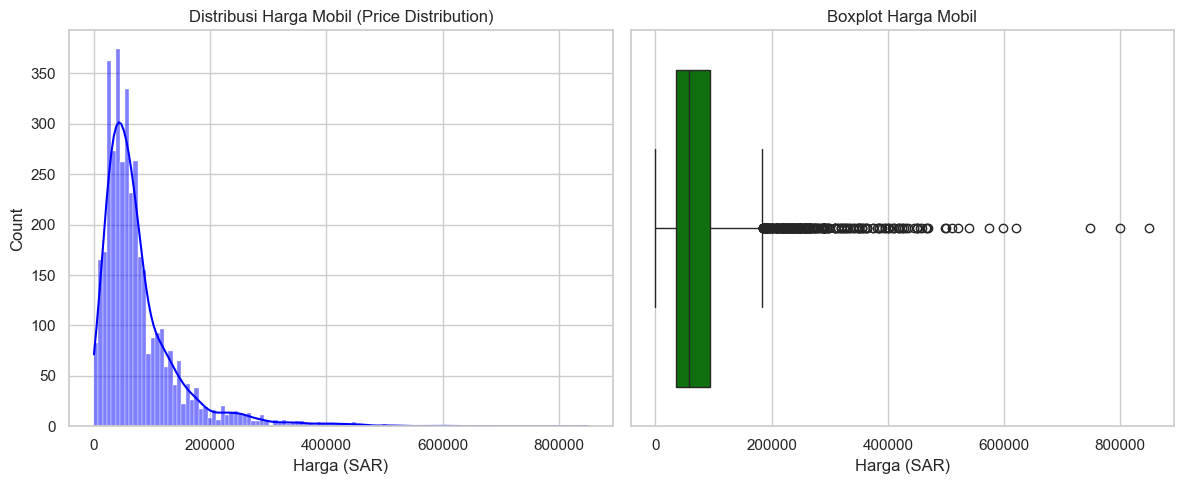

count      3824.000000
mean      78019.245031
std       72748.182183
min           1.000000
25%       35000.000000
50%       58000.000000
75%       94250.000000
max      850000.000000
Name: Price, dtype: float64


In [16]:
# Visualisasi Distribusi Harga
plt.figure(figsize=(12, 5))

# Histogram & KDE
plt.subplot(1, 2, 1)
sns.histplot(df_eda['Price'], kde=True, color='blue')
plt.title('Distribusi Harga Mobil (Price Distribution)')
plt.xlabel('Harga (SAR)')

# Boxplot (untuk melihat outlier)
plt.subplot(1, 2, 2)
sns.boxplot(x=df_eda['Price'], color='green')
plt.title('Boxplot Harga Mobil')
plt.xlabel('Harga (SAR)')

plt.tight_layout()
plt.show()

# Cek statistik deskriptifnya
print(df_eda['Price'].describe())

**Distribusi:** Sangat *Right-Skewed* (menceng ke kanan). Sebagian besar mobil berada di kisaran harga rendah hingga menengah (rata-rata ~78.000 SAR), namun ada *long tail* menuju harga sangat tinggi (hingga 850.000 SAR).
* **Implikasi:** Model mungkin akan bias ke harga rendah. Transformasi target (seperti *Log Transformation*) mungkin diperlukan saat modelling nanti untuk menormalkan distribusi.
* **Outlier:** Boxplot menunjukkan banyak outlier di harga atas (mobil mewah/sport).

Analisis Fitur Numerik `(Year, Mileage, Engine_Size)`

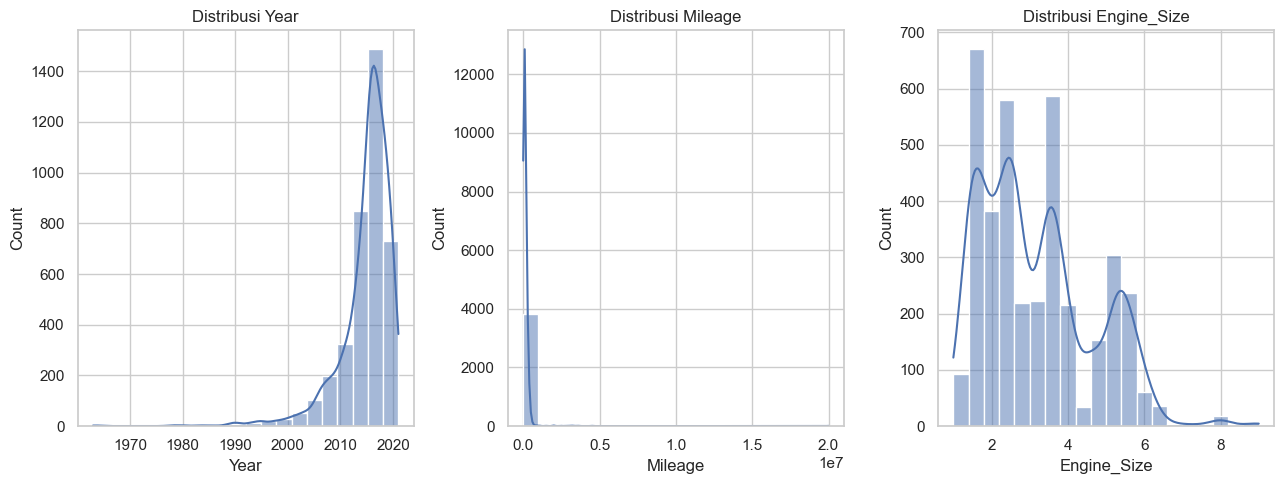

In [17]:
cols = ['Year', 'Mileage', 'Engine_Size']

plt.figure(figsize=(13, 5))
for i, col in enumerate(cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(df_eda[col], kde=True, bins=20)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

* **`Year`:** Didominasi oleh mobil-mobil baru (di atas tahun 2015).
* **`Mileage`:** *Right-skewed*. Mayoritas mobil memiliki jarak tempuh rendah-menengah, namun ada beberapa mobil dengan kilometer ekstrem.

Analisis Fitur Kategorikal `(Make, Gear_Type, Region)`

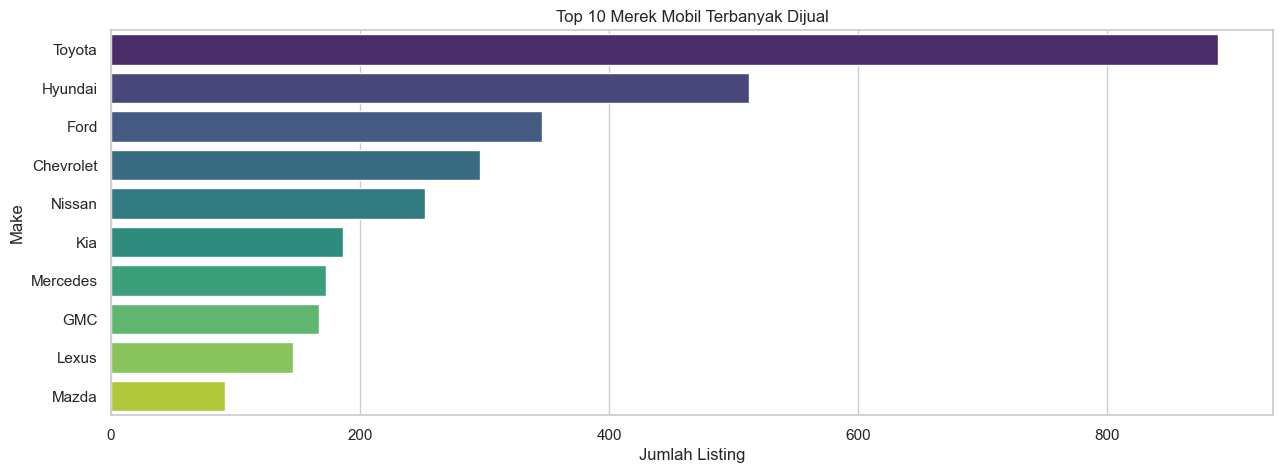

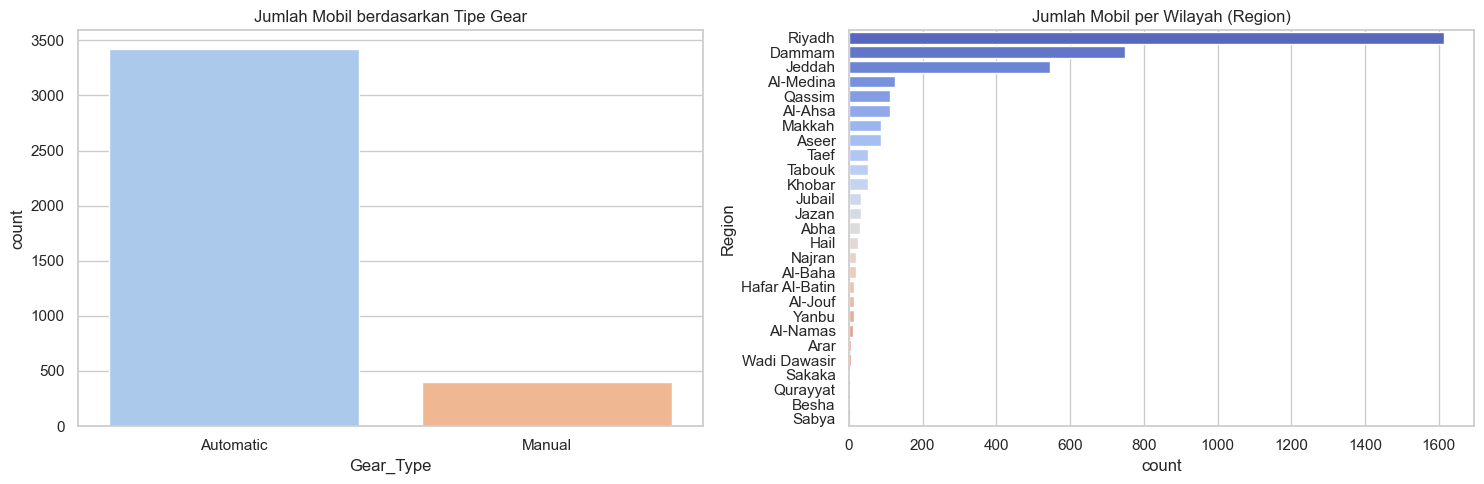

In [18]:
# 1. Top 10 Merek Mobil Terbanyak
plt.figure(figsize=(15, 5))
top_makes = df_eda['Make'].value_counts().head(10)
sns.barplot(x=top_makes.values, y=top_makes.index, palette='viridis')
plt.title('Top 10 Merek Mobil Terbanyak Dijual')
plt.xlabel('Jumlah Listing')
plt.show()

# 2. Distribusi Tipe Gear dan Region
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='Gear_Type', data=df_eda, palette='pastel')
plt.title('Jumlah Mobil berdasarkan Tipe Gear')

plt.subplot(1, 2, 2)
sns.countplot(y='Region', data=df_eda, order=df_eda['Region'].value_counts().index, palette='coolwarm')
plt.title('Jumlah Mobil per Wilayah (Region)')

plt.tight_layout()
plt.show()

* **`Make`:** Toyota adalah pemimpin pasar yang dominan, diikuti Hyundai dan Ford.
* **`Gear_Type`:** Tidak seimbang (*Imbalanced*). Mayoritas absolut adalah *Automatic*. Mobil *Manual* sangat jarang.
* **`Region`:** Riyadh memiliki volume penjualan tertinggi, jauh melampaui kota lain.

### Bivariate Analysis

Hubungan Numerik vs Harga (Scatter Plot)

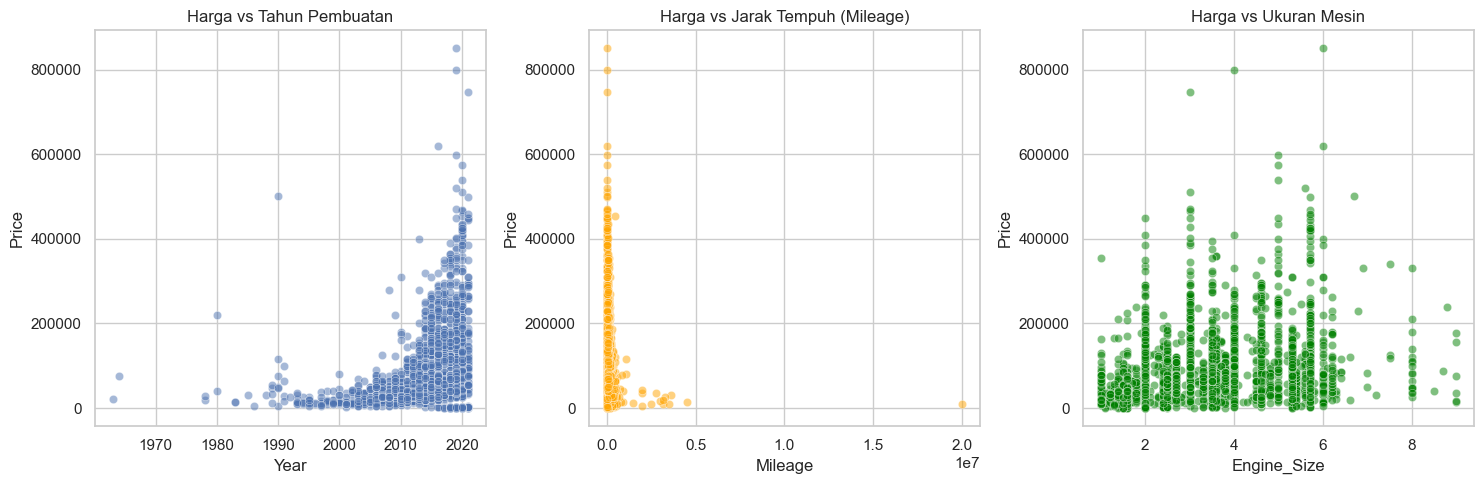

In [19]:
# Scatter plot untuk melihat korelasi
plt.figure(figsize=(15, 5))

# Price vs Year
plt.subplot(1, 3, 1)
sns.scatterplot(x='Year', y='Price', data=df_eda, alpha=0.5)
plt.title('Harga vs Tahun Pembuatan')

# Price vs Mileage
plt.subplot(1, 3, 2)
sns.scatterplot(x='Mileage', y='Price', data=df_eda, alpha=0.5, color='orange')
plt.title('Harga vs Jarak Tempuh (Mileage)')

# Price vs Engine Size
plt.subplot(1, 3, 3)
sns.scatterplot(x='Engine_Size', y='Price', data=df_eda, alpha=0.5, color='green')
plt.title('Harga vs Ukuran Mesin')

plt.tight_layout()
plt.show()

* **`Year` vs `Price`:** Korelasi positif terlihat jelas. Semakin baru tahun pembuatan, harga cenderung semakin tinggi.
* **`Mileage` vs `Price`:** Korelasi negatif. Semakin tinggi jarak tempuh, harga cenderung turun (meskipun variansinya cukup besar).
* **`Engine_Size` vs `Price`:** Korelasi positif. Mesin yang lebih besar (biasanya SUV atau mobil mewah) cenderung lebih mahal.

Hubungan Kategorikal vs Harga (Box Plot)

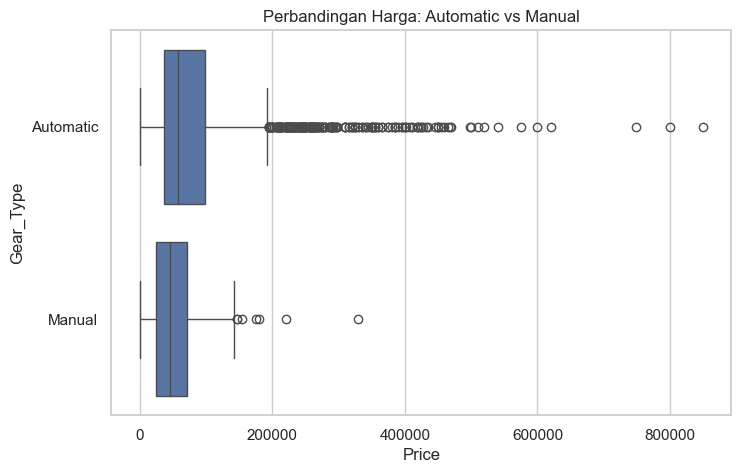

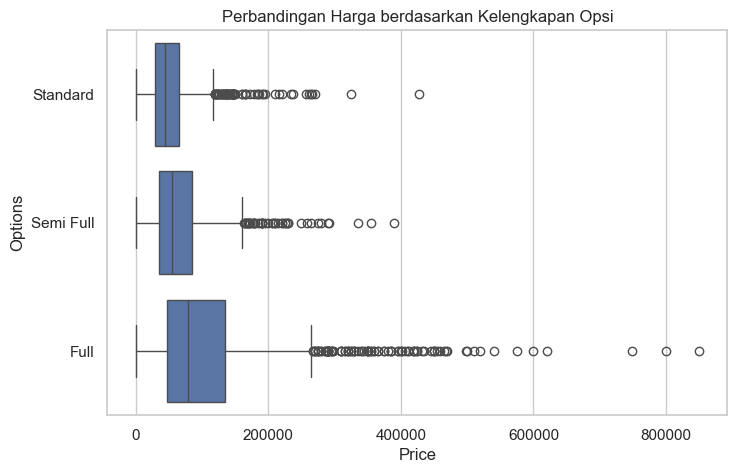

In [20]:
# 1. Harga berdasarkan Tipe Gear
plt.figure(figsize=(8, 5))
sns.boxplot(x='Price', y='Gear_Type', data=df_eda)
plt.title('Perbandingan Harga: Automatic vs Manual')
plt.show()

# 2. Harga berdasarkan Opsi (Options)
plt.figure(figsize=(8, 5))
sns.boxplot(x='Price', y='Options', data=df_eda, order=['Standard', 'Semi Full', 'Full'])
plt.title('Perbandingan Harga berdasarkan Kelengkapan Opsi')
plt.show()

* **`Gear_Type`:** Mobil *Automatic* memiliki median harga yang jauh lebih tinggi dan variasi harga yang lebih lebar dibandingkan *Manual*.
* **`Options`:** Terlihat hierarki harga yang logis: **Full > Semi Full > Standard**. Ini mengonfirmasi bahwa fitur mobil sangat mempengaruhi harga jual.

### Multivariate Analysis

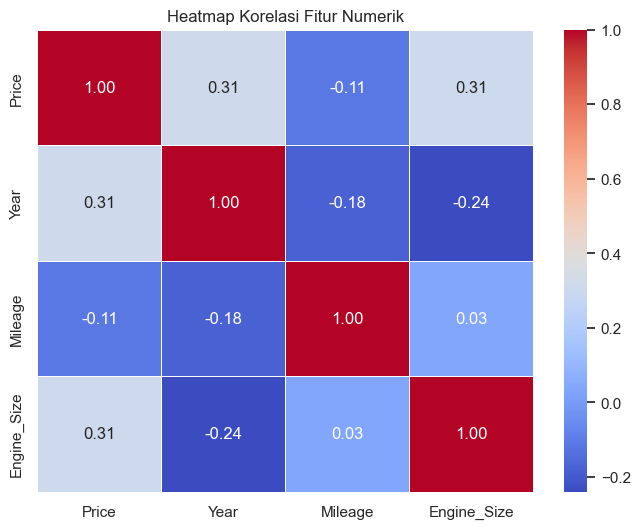

In [21]:
# Hitung korelasi
correlation = df_eda[['Price', 'Year', 'Mileage', 'Engine_Size']].corr()

# Gambar Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

* Fitur yang paling berkorelasi positif dengan harga adalah **`Engine_Size` (0.31)** dan **`Year` (0.31)**.
* **`Mileage`** memiliki korelasi negatif lemah (-0.11) secara linear, namun secara visual di scatterplot pengaruhnya cukup terlihat (mobil km rendah harganya tinggi).

Rekomendasi
1.  **Transformasi Target:** Karena distribusi harga *skewed*, disarankan menggunakan `Log(Price)` saat training agar error lebih stabil.
2.  **Handling Outlier:** Perlu strategi khusus untuk menangani mobil dengan harga ekstrem (misal > 500.000 SAR) agar tidak merusak prediksi mobil murah.
3.  **Encoding:** Fitur `Region` dan `Make` memiliki banyak kategori unik, sebaiknya gunakan *Binary Encoding* atau *Target Encoding* daripada One-Hot Encoding untuk menghindari dimensi yang terlalu besar.

## **Data Prepocessing**

### Feature Engineering

In [23]:
import datetime
current_year = datetime.datetime.now().year
df_eda['Car_Age'] = current_year - df_eda['Year']

Pada langkah ini, kita membuat fitur **`Car_Age`** yang menunjukkan umur mobil. **`Car_Age`** dihitung dari tahun saat ini dikurangi tahun produksi. Fitur ini penting karena umur mobil sangat memengaruhi harga—semakin tua mobil, biasanya semakin rendah nilainya.

In [24]:
X = df_eda.drop(columns=['Price', 'Negotiable', 'Year'])
y = df_eda['Price'] # Target prediksi

Di bagian ini, kita memisahkan data menjadi :

* **`y`**: Price, sebagai nilai yang ingin diprediksi,

* **`X`**: semua fitur selain Price, Negotiable, dan Year.

Kolom **`Negotiable`** dihapus karena datanya sudah disaring, dan **`Year`** dihapus karena sudah digantikan oleh **`Car_Age`**.

In [25]:
print("Fitur yang akan digunakan:")
display(X.head())

Fitur yang akan digunakan:


,Type,Region,Make,Gear_Type,Origin,Options,Engine_Size,Mileage,Car_Age
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,8.0,80000,11
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,5.0,140000,10
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2.4,220000,10
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2.0,25000,6
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,4.8,189000,13


### Data Spliting

In [26]:
from sklearn.model_selection import train_test_split

# Split data 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

print(f"Jumlah Data Train: {X_train.shape[0]}")
print(f"Jumlah Data Test : {X_test.shape[0]}")

Jumlah Data Train: 3059
Jumlah Data Test : 765


Pada tahap ini, dataset dibagi menjadi dua bagian menggunakan rasio 80:20, yaitu 80% sebagai data train dan 20% sebagai data test.
Pembagian ini bertujuan agar model dapat dilatih pada sebagian besar data, kemudian dievaluasi menggunakan data yang belum pernah dilihat sebelumnya. Dengan cara ini, kita dapat menilai apakah model mampu melakukan generalisasi dengan baik.

### Pipeline Prepocessing

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler
import category_encoders as ce

# --- PENGELOMPOKAN KOLOM ---
# Kategori dengan jumlah unik sedikit -> OneHotEncoder
cat_low_cardinality = ['Gear_Type', 'Origin', 'Options']

# Kategori dengan jumlah unik banyak -> BinaryEncoder
cat_high_cardinality = ['Make', 'Type', 'Region']

# Fitur Numerik -> RobustScaler
numerical_features = ['Engine_Size', 'Mileage', 'Car_Age']

# --- MEMBUAT PIPELINE PREPROCESSING ---
preprocessor = ColumnTransformer([
    # One Hot Encoding untuk kategori sedikit
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_low_cardinality),

    # Binary Encoding untuk kategori banyak (Efisien memori & performa)
    ('binary', ce.BinaryEncoder(), cat_high_cardinality),

    # Scaling untuk angka
    ('scaler', RobustScaler(), numerical_features)
], remainder='passthrough')

print("Pipeline Preprocessing berhasil disiapkan")

Pipeline Preprocessing berhasil disiapkan


Data diproses sesuai jenis fiturnya agar lebih siap digunakan model:

1. **Fitur kategori dengan sedikit variasi**
   Kolom seperti `Gear_Type`, `Origin`, dan `Options` diencode menggunakan **OneHotEncoder** karena kategorinya tidak terlalu banyak.

2. **Fitur kategori dengan banyak variasi**
   Kolom `Make`, `Type`, dan `Region` menggunakan **BinaryEncoder** untuk menghindari jumlah kolom yang terlalu besar.

3. **Fitur numerik**
   Kolom `Engine_Size`, `Mileage`, dan `Car_Age` diskalakan menggunakan **RobustScaler**, yang lebih stabil terhadap keberadaan outlier.

Seluruh langkah encoding dan scaling digabungkan dalam **ColumnTransformer**, sehingga proses preprocessing berjalan otomatis dan konsisten sebelum pemodelan.

## **Modelling**

### Benchmarking Model

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Daftar Model
models = [
    ('Ridge', Ridge(random_state=2023)),
    ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=2023, n_jobs=-1)),
    ('XGBoost', XGBRegressor(random_state=2023, n_jobs=-1)),
    ('LightGBM', LGBMRegressor(random_state=2023, n_jobs=-1, verbose=-1)),
    ('CatBoost', CatBoostRegressor(verbose=False, random_state=2023))
]

results = []

In [ ]:
for name, model in models:
    model_pipeline = Pipeline([
        ('preprocessing', preprocessor), 
        ('algo', model)
    ])

    try:
        cv_scores = cross_val_score(
            model_pipeline,
            X_train,
            y_train,
            cv=5,
            scoring='neg_root_mean_squared_error',
            n_jobs=-1
        )

        results.append({
            'Model': name,
            'RMSE Score': -cv_scores.mean(), 
            'Std Dev': cv_scores.std()
        })
        print(f"{name} selesai. RMSE: {-cv_scores.mean():.0f}")

    except Exception as e:
        print(f"{name} gagal. Error: {e}")

Ridge selesai. RMSE: 53789
Random Forest selesai. RMSE: 36192
XGBoost selesai. RMSE: 34646
LightGBM selesai. RMSE: 34452
CatBoost selesai. RMSE: nan


Beberapa model regresi diuji menggunakan **5-fold Cross Validation** dengan pipeline yang menggabungkan preprocessing dan algoritma model.
Hal ini memastikan setiap model dievaluasi secara konsisten dengan metrik **RMSE**, sehingga performanya dapat dibandingkan secara objektif.

**Kesimpulan:**
* Semua model berhasil dievaluasi dengan performa yang berbeda.
* **`CatBoost`** memiliki RMSE terendah (32.759 SAR), menunjukkan akurasi terbaik pada dataset ini.
* Model linear sederhana seperti **`Ridge`** memiliki RMSE tertinggi, sedangkan model ensemble dan boosting menunjukkan performa yang lebih baik.

In [30]:
df_results = pd.DataFrame(results).sort_values('RMSE Score')
df_results

,Model,RMSE Score,Std Dev
3,LightGBM,34451.736571,4949.827549
2,XGBoost,34645.565625,4514.889217
1,Random Forest,36192.105868,5056.954054
0,Ridge,53788.980976,4187.327583
4,CatBoost,NaN,NaN


Hasil evaluasi RMSE dari semua model disimpan dalam sebuah tabel dan diurutkan dari yang paling rendah ke paling tinggi.
Dari tabel terlihat bahwa :
* **CatBoost** menunjukkan performa terbaik dengan RMSE terendah, menandakan prediksi harga mobil paling akurat.
* Model boosting lain seperti **LightGBM** dan **XGBoost** juga memiliki performa baik, sedikit di atas CatBoost.
* Model ensemble seperti **Random Forest** lebih tinggi RMSE-nya dibanding model boosting.
* Model linear sederhana (**Ridge**) memiliki RMSE tertinggi, sehingga kurang akurat dibanding model ensemble atau boosting.

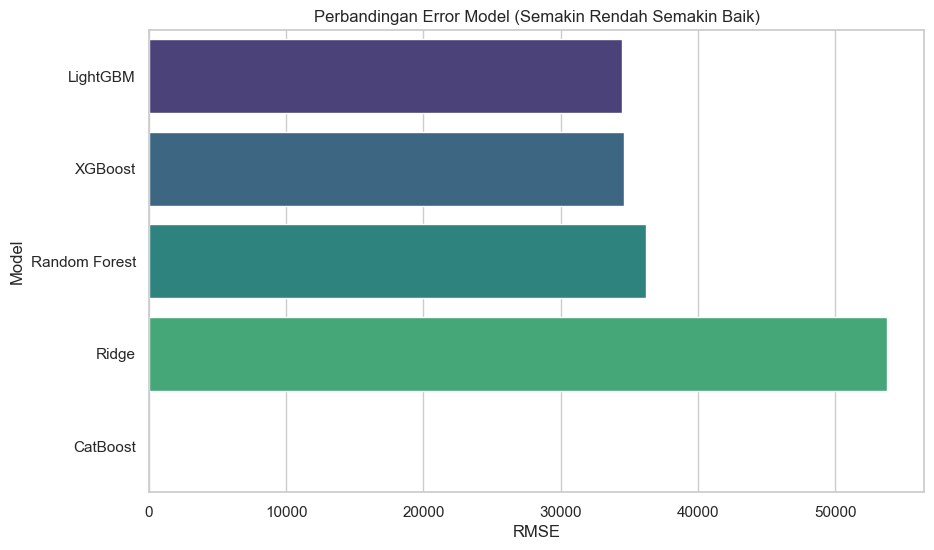

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x='RMSE Score', y='Model', data=df_results, palette='viridis')
plt.title('Perbandingan Error Model (Semakin Rendah Semakin Baik)')
plt.xlabel('RMSE')
plt.show()

Grafik bar di atas menampilkan nilai **RMSE (Root Mean Squared Error)** dari setiap algoritma yang diuji. Semakin rendah nilai RMSE, semakin baik performa model dalam memprediksi harga mobil bekas.

Dari hasil visualisasi terlihat bahwa:

* **CatBoost** berada pada posisi terbaik dengan RMSE paling rendah.
* **LightGBM** dan **XGBoost** berada pada urutan berikutnya dengan selisih nilai yang cukup dekat.
* **Random Forest** memiliki error lebih tinggi dibanding model berbasis boosting.
* **Ridge Regression** menunjukkan performa paling rendah, menandakan bahwa pendekatan linear kurang mampu menangkap kompleksitas data.

Grafik ini membantu memberikan gambaran cepat mengenai model mana yang paling efektif untuk digunakan pada tahap tuning selanjutnya.

### Hyperparameter Tuning (CatBoost)

In [32]:
from sklearn.model_selection import RandomizedSearchCV

model_pemenang = CatBoostRegressor(verbose=False, random_state=2023)

pipeline_tuning = Pipeline([
    ('preprocessing', preprocessor),
    ('algo', model_pemenang)
])

param_grid = {
    'algo__iterations': [500, 1000],          # Jumlah iterasi (banyaknya tree yang dibangun)
    'algo__learning_rate': [0.01, 0.05, 0.1], # Kecepatan pembelajaran
    'algo__depth': [4, 6, 8],                 # Kedalaman tree
    'algo__l2_leaf_reg': [1, 3, 5]            # Regulasi untuk mengurangi overfitting
}

random_search = RandomizedSearchCV(
    pipeline_tuning,
    param_distributions=param_grid,
    n_iter=10, # Mencoba 10 kombinasi parameter secara acak
    cv=3,      # Menggunakan 3-fold cross validation
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1,
    random_state=2023
)

random_search.fit(X_train, y_train)

print(f"Parameter Terbaik: {random_search.best_params_}")
print(f"RMSE Terbaik (saat Tuning): {-random_search.best_score_:.0f}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Parameter Terbaik: {'algo__learning_rate': 0.05, 'algo__l2_leaf_reg': 1, 'algo__iterations': 1000, 'algo__depth': 8}
RMSE Terbaik (saat Tuning): 34289


Proses tuning dilakukan menggunakan **RandomizedSearchCV** untuk mencari kombinasi parameter terbaik pada model **CatBoost**. Setelah mencoba beberapa kombinasi, proses tuning menghasilkan performa terbaik dengan nilai **RMSE** sebesar **34.289**, yang menunjukkan bahwa model semakin presisi dan kesalahan prediksi rata-rata semakin kecil.

Parameter terbaik yang ditemukan adalah:

* **`iterations = 1000`** → jumlah pohon keputusan yang digunakan model. Angka yang lebih besar membantu model menangkap pola lebih detail.
* **`depth = 8`** → kedalaman setiap tree. Nilai ini membantu model mempelajari hubungan fitur yang lebih kompleks tanpa terlalu sederhana.
* **`learning_rate = 0.05`** → mengatur seberapa besar perubahan yang dilakukan model setiap iterasi. Nilai yang tidak terlalu besar membuat proses pembelajaran lebih stabil dan mencegah lonjakan prediksi.
* **`l2_leaf_reg = 1`** → fungsi regulasi untuk menghindari overfitting agar model tetap general dan tidak hanya bagus pada data train.

Secara keseluruhan, kombinasi parameter tersebut meningkatkan kemampuan model dalam memprediksi harga mobil bekas, membuat hasil lebih stabil dan akurat dibanding sebelum tuning.

In [34]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Evaluasi model pada data test
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Hitung metrik
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred) # Hitung MSE dulu
rmse = np.sqrt(mse) # Lalu akarkuadratkan manual biar jadi RMSE
r2 = r2_score(y_test, y_pred)

print("=== EVALUASI MODEL ===")
print(f"MAE  (Rata-rata Meleset): {mae:,.2f} SAR")
print(f"RMSE (Kesalahan Standar): {rmse:,.2f} SAR")
print(f"R2   (Kecocokan Data)   : {r2:.2%}")

=== EVALUASI MODEL ===
MAE  (Rata-rata Meleset): 14,306.77 SAR
RMSE (Kesalahan Standar): 26,544.81 SAR
R2   (Kecocokan Data)   : 87.54%


Model CatBoost yang sudah melalui proses tuning kemudian diuji menggunakan data test untuk melihat performanya pada data yang belum pernah dilihat sebelumnya. Hasil evaluasi menunjukkan :
* **MAE = 14.306 SAR**
  Rata-rata selisih antara prediksi dan harga aktual cukup kecil, sehingga model dapat memperkirakan harga dengan cukup presisi.
* **RMSE = 26.544 SAR**
  Menunjukkan tingkat kesalahan standar model, dan nilainya relatif rendah untuk skala harga mobil bekas.
* **R² = 87.54%**
  Artinya model mampu menjelaskan sekitar **87% variasi harga** berdasarkan fitur yang digunakan.



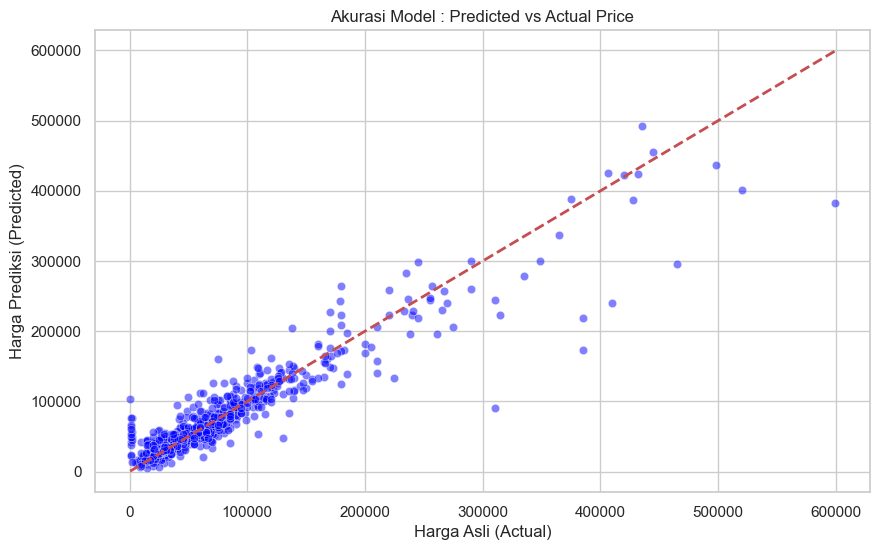

In [35]:
# Plot Prediksi vs Aktual
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Garis diagonal
plt.xlabel('Harga Asli (Actual)')
plt.ylabel('Harga Prediksi (Predicted)')
plt.title('Akurasi Model : Predicted vs Actual Price')
plt.show()

Visualisasi scatter plot memperlihatkan bahwa **titik prediksi (biru)** banyak berada dekat **garis diagonal merah**, yang menunjukkan bahwa hasil prediksi sudah cukup mendekati nilai aktual.

In [39]:
import pickle

filename = 'saudi_car_price_model.pkl'

with open(filename, 'wb') as file:
    pickle.dump(best_model, file)

print(f"Model berhasil disimpan menggunakan Pickle sebagai: {filename}")

Model berhasil disimpan menggunakan Pickle sebagai: saudi_car_price_model.pkl


## **Conclusion**

In [37]:
from sklearn.inspection import permutation_importance

# Kita gunakan Permutation Importance karena paling akurat untuk Pipeline yang kompleks
result = permutation_importance(
    best_model, X_test, y_test, n_repeats=5, random_state=2023, n_jobs=-1
)

# Buat DataFrame
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

# Tampilkan Tabel Top Fitur
display(importance_df.head(10))

,Feature,Importance
8,Car_Age,0.528581
6,Engine_Size,0.375425
2,Make,0.344873
0,Type,0.107933
7,Mileage,0.080688
5,Options,0.041099
3,Gear_Type,0.000198
1,Region,-0.000690
4,Origin,-0.002264


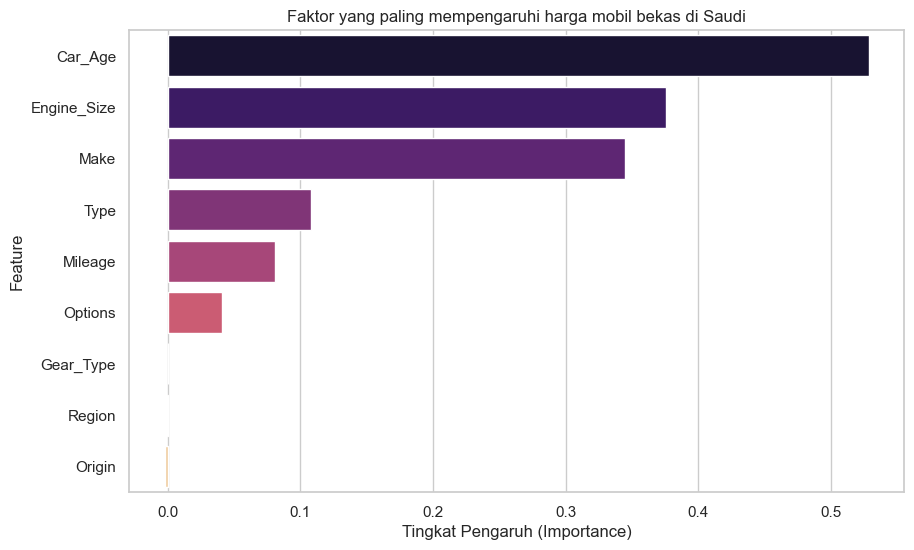

In [38]:
# Plot Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='magma')
plt.title('Faktor yang paling mempengaruhi harga mobil bekas di Saudi')
plt.xlabel('Tingkat Pengaruh (Importance)')
plt.show()

Tabel dan visualisasi diatas menampilkan daftar fitur yang paling berpengaruh terhadap prediksi harga mobil bekas. Dari tabel tersebut dapat dilihat bahwa:

* **Car_Age** memiliki nilai pengaruh tertinggi, menandakan bahwa usia kendaraan merupakan faktor utama yang menentukan harga.
* **Engine_Size** dan **Make** juga memberikan kontribusi besar, yang berarti kapasitas mesin dan merek mobil berperan signifikan dalam penentuan nilai jual.
* **Type** dan **Mileage** tetap memiliki peran, meskipun tidak sebesar tiga fitur utama.
* Sebaliknya, fitur seperti **Gear_Type**, **Region**, dan **Origin** menunjukkan pengaruh yang sangat kecil.

Penelitian ini bertujuan untuk membangun model prediksi harga mobil bekas di Arab Saudi dengan memanfaatkan data spesifikasi kendaraan. Setelah melalui proses *data cleaning*, *feature engineering*, *train-test split*, dan *model evaluation*, diperoleh bahwa **CatBoost menjadi model terbaik** dibandingkan algoritma lain yang diuji. Model ini memberikan performa prediksi yang sangat baik dengan hasil:

* **MAE = 14.306 SAR**
* **RMSE = 26.544 SAR**
* **R² = 87.54%**

Nilai **R² sebesar 87.54%** menunjukkan bahwa model mampu menjelaskan sebagian besar variasi harga mobil berdasarkan fitur yang tersedia, sehingga cukup reliabel untuk digunakan sebagai alat rekomendasi harga.

Analisis **Permutation Feature Importance** menunjukkan bahwa faktor yang paling berpengaruh dalam menentukan harga mobil bekas adalah:

1. **Car_Age (usia kendaraan)** – semakin baru usia mobil, semakin tinggi harga jualnya.
2. **Engine_Size (kapasitas mesin)** – kapasitas mesin besar cenderung memiliki nominal harga yang lebih tinggi.
3. **Make (merek kendaraan)** – merek premium memiliki nilai pasar yang jauh lebih tinggi.
4. **Type (jenis kendaraan)** dan **Mileage (jarak tempuh)** juga memberikan pengaruh yang signifikan.

Sementara fitur seperti **Gear_Type**, **Region**, dan **Origin** memiliki kontribusi yang jauh lebih kecil dan tidak memberikan pengaruh berarti dalam meningkatkan akurasi prediksi.

Secara visual, grafik *feature importance* menunjukkan dominasi yang sangat jelas dari **Car_Age, Engine_Size, dan Make**, diikuti fitur lain dengan selisih yang cukup besar.

Secara keseluruhan, model prediksi harga yang dihasilkan sudah cukup akurat dan dapat digunakan sebagai sistem pendukung keputusan untuk membantu penentuan harga mobil bekas yang lebih objektif dan transparan.


## **Recommendation**

### **Untuk Pengembangan Bisnis / Marketplace Otomotif**

* Model dapat diintegrasikan sebagai **Price Recommendation Engine** pada platform jual beli mobil untuk membantu penjual menentukan harga awal yang realistis.
* Menampilkan indikator seperti **"Good Deal", "Fair Price", dan "Overpriced"** dapat meningkatkan kepercayaan pembeli dalam proses transaksi.
* Fitur **Automatic Pricing Suggestion** dapat digunakan untuk menganalisis ulang harga berdasarkan perubahan pasar atau histori waktu listing.
* Implementasi *data-driven pricing* berpotensi meningkatkan rasio penjualan dan mempercepat waktu closing transaksi.

### **Untuk Pengembangan Model Lebih Lanjut**

* Menambahkan fitur penting seperti **riwayat servis, kondisi fisik, fuel type, accident record, dan grade exterior/interior** untuk meningkatkan akurasi.
* Melakukan **transformasi log pada harga** untuk mengurangi efek outlier ekstrem.
* Mengembangkan **model ensemble atau stacking** sebagai alternatif peningkatan performa.
* Mengumpulkan data transaksi secara berkala untuk melakukan **model retraining** agar model tetap relevan mengikuti dinamika pasar.



## **Overall Insight**

Pemanfaatan Machine Learning dalam prediksi harga kendaraan bekas memberikan peluang besar dalam meningkatkan **efisiensi pasar**, **transparansi harga**, dan **kepercayaan konsumen**, baik dari sisi penjual maupun pembeli. Dengan pengembangan lanjutan dan integrasi sistem yang tepat, model ini berpotensi menjadi fitur strategis dalam transformasi digital industri otomotif.

